# Bonus Homework 1: Financial Data

## Preliminararies

### Imports

In [1]:
import os
from datetime import date

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import statsmodels.tsa.stattools
import statsmodels.graphics.tsaplots

%matplotlib inline

/home/manel/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Data Dir

In [2]:
data_dir="../../data/finance"

## CMT Treasury Rate Data

<div class="alert alert-block alert-info"> Problem 1.0 </div>
Load the data "H15.csv" file into a pandas dataframe.

In [3]:
H15=pd.read_csv(data_dir+"/H15.csv",index_col=[0],parse_dates=[0])
H15.head()

,3M,6M,1Y,2Y,3Y,5Y,7Y,10Y,20Y,30Y
DATE,,,,,,,,,,
2006-02-09,4.52,4.67,4.66,4.66,4.62,4.55,4.55,4.54,4.72,4.51
2006-02-10,4.53,4.70,4.70,4.69,4.67,4.59,4.59,4.59,4.76,4.55
2006-02-13,4.55,4.71,4.70,4.68,4.66,4.58,4.58,4.58,4.76,4.56
2006-02-14,4.55,4.72,4.71,4.69,4.68,4.61,4.61,4.62,4.80,4.60
2006-02-15,4.55,4.70,4.70,4.71,4.68,4.60,4.60,4.61,4.78,4.58


<div class="alert alert-block alert-info">Problem 1.1</div>
Plot the history of the 2 year and 5 year CMT rates 
(the `plot()` function of the `pd.DataFrame` object by be useful)

Text(0,0.5,'Rate')

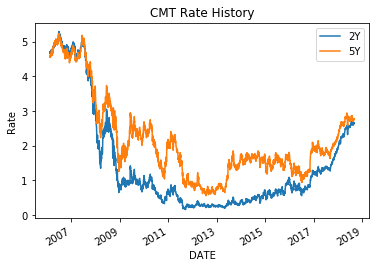

In [4]:
H15[["2Y","5Y"]].plot()
plt.title("CMT Rate History")
plt.ylabel("Rate")


<div class="alert alert-block alert-info">Problem 1.2</div>

Do the rates  at two  consecutive dates (for the same tenor) look independent of each other?

In [5]:
# No, they look highly correlated.

### Auto Correlation of Rate Levels

For two time series of length $N$, the **auto correlation** function is defined by ([see](https://www.mathworks.com/help/econ/autocorrelation-and-partial-autocorrelation.html),
or [wikipedia] https://en.wikipedia.org/wiki/Autocorrelation)
is defined as

$$
    \rho_\tau(X,Y) = \frac{C_\tau(X,Y)}{C_0(X,Y)}
$$
where the shifted covariance $C_\tau(X,Y)$ is defined by
$$
    C_\tau(X,Y)= \sum_{t=0}^{N-\tau} (X_{t}-\mu_X)(Y_{t+\tau}-\mu_Y)
$$
and where $\mu_X$ and $\mu_Y$ are the sample means
\begin{align}
    \mu_X &=\frac{1}{N} \sum_{t=1}^N X_t \\
    \mu_Y &=\frac{1}{N} \sum_{t=1}^N Y_t \\
\end{align} 

Other definitions that differ by factors of order $\frac{1}{N-k}$ are possible, but give very similar results provided $N \gg k$. 

<div class="alert alert-block alert-info">Problem 1.3</div>
Compute the auto correlation of the 5Y CMT rate with itself for lags $\tau=0,1,\dots,5$.

What would you expect those correlations to be if rates for different time were independent from each other?

In [6]:
def auto_correlation(X,Y,tau):
    if tau==0:
        return 1.0 # by definition
    DX=X-X.mean()
    DY=Y-Y.mean()
    C0=np.sum(DX*DY)
    C_tau=np.sum(DX[0:-tau]*DY[tau:])
    return C_tau/C0

In [7]:
cmt5=H15["5Y"].values # get a numpy array out of pandas

In [8]:
rho=np.empty(6)
for tau in range(0,6):
    rho[tau]=auto_correlation(cmt5,cmt5,tau)
rho

array([1.        , 0.99817712, 0.99642824, 0.99483342, 0.9931474 ,
       0.99148257])

In [9]:
# correlations for all lags other $\tau=0$ should be zero. The correlation for $\tau=0$ should be 1.0 

<div class="alert alert-block alert-info">Problem 1.4</div>
Compare your results this the function [`statsmodels.tsa.stattools.acf`](https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.acf.html)

In [10]:
acf=statsmodels.tsa.stattools.acf(cmt5)[:6]

In [11]:
acf-rho

array([0.00000000e+00, 3.33066907e-16, 2.22044605e-16, 2.22044605e-16,
       1.11022302e-16, 1.11022302e-16])

In [12]:
# They are  identical within numerical pricision

<div class="alert alert-block alert-info">Problem 1.5</div>

Use function [`statsmodels.graphics.tsaplots.plot_acf`](https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.plot_acf.html)
to plot the auto correlation for the 50 first $\tau$ lags (using the argument `lags` )

The light blue shaded area is the confidence interval for the empirical auto-correlation assuming $X$ and $ Y$ times series
are uncorrelated at lag $\tau$.

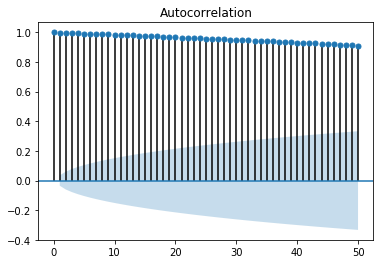

In [13]:
 a=statsmodels.graphics.tsaplots.plot_acf(cmt5,lags=50)

<div class="alert alert-block alert-info">Problem 1.6</div>
It the auto correlation function significantly difference from zero up to lag 50?


In [14]:
# Yes, it is.

### Time series of changes of the CMT 5Y rate

<div class="alert alert-block alert-info">Problem 1.7</div>
create a series  for the 1-lag difference of CMT rates
$$
    \Delta_1 Y_t = Y_{t+1}-Y_{t}
$$

In [15]:
Delta_cmt5=cmt5[1:]-cmt5[:-1]

<div class="alert alert-block alert-info">Problem 1.8</div>
Compute the auto correlation 
$$
    \rho_\tau(\Delta_1 Y_t,\Delta_1 Y_t)
$$
for lags $\tau=0,1,\cdots 5$ when $Y$ is the 5Y CMT rate.


In [16]:
acf=statsmodels.tsa.stattools.acf(Delta_cmt5)[:6]
acf

array([ 1.        , -0.04138359, -0.0617599 ,  0.03177387, -0.00863381,
       -0.03012158])

<div class="alert alert-block alert-info">Problem 1.9</div>
use `statsmodels.graphics.tsaplots.plot_acf` to visual investigate if the 50 first lag correlations are significantly different from zero.


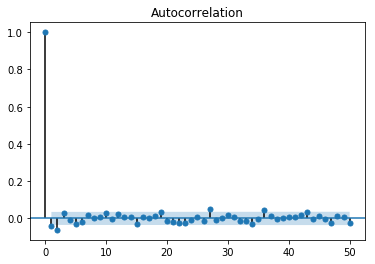

In [17]:
 a=statsmodels.graphics.tsaplots.plot_acf(Delta_cmt5,lags=50)

In [18]:
#The first two lags may be  slighly out of the 95% confidence band (negative correlation),
#   but even then, those auto correlations are small. 
# All other lags look statistically no different from zero.


## Equity Market Indexes

<div class="alert alert-block alert-info"> Problem 2.0 </div>
Load the data "RussellIndexes.csv" file into a pandas dataframe.

In [19]:
equity=pd.read_csv(data_dir+"/RussellIndexes.csv",index_col=[0],parse_dates=[0])
equity.head()

,RU3000,RU2000,RU1000V,RU1000,RU2000V,RU1000G,RUMIDCAP,RU2000G,RU3000V,RMIDGR,RMIDVL,RU3000G
DATE,,,,,,,,,,,,
1995-05-31,1032.69,982.04,192.75,1036.37,1203.23,181.34,1242.92,1190.50,1000.00,338.75,328.35,1000.00
1995-06-01,1034.42,986.60,193.05,1037.77,1209.42,181.55,1246.34,1195.46,1001.91,339.98,329.00,1001.45
1995-06-02,1034.56,989.48,192.99,1037.61,1212.55,181.54,1247.38,1199.32,1001.90,340.23,329.30,1001.72
1995-06-05,1041.21,996.50,194.27,1044.21,1219.08,182.66,1259.02,1209.81,1008.40,343.85,331.99,1008.11
1995-06-06,1041.04,998.22,194.20,1043.82,1221.69,182.59,1258.83,1211.42,1008.28,343.47,332.23,1007.89


<div class="alert alert-block alert-info">Problem 2.1</div>
Plot the history of the RU3000 and RUMIDCAP equity indexes 
(the `plot()` function of the `pd.DataFrame` object by be useful)

Text(0,0.5,'Equity')

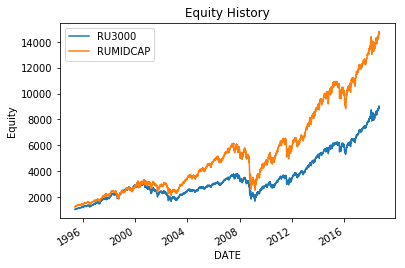

In [20]:
equity[["RU3000","RUMIDCAP"]].plot()
plt.title("Equity History")
plt.ylabel("Equity")


<div class="alert alert-block alert-info">Problem 2.2</div>
Plot the history of the log of RU3000 and RUMIDCAP equity indexes 
(the `plot()` function of the `pd.DataFrame` object by be useful)

Text(0,0.5,'log(Equity)')

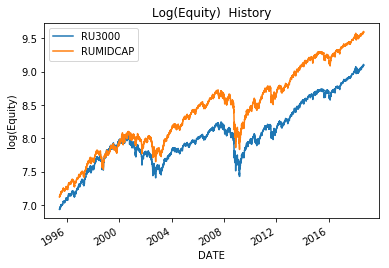

In [21]:
log_equity=np.log(equity)
log_equity[["RU3000","RUMIDCAP"]].plot()
plt.title("Log(Equity)  History")
plt.ylabel("log(Equity)")

<div class="alert alert-block alert-info">Problem 2.3</div>
use `statsmodels.graphics.tsaplots.plot_acf` to visual investigate if the 50 first lag correlations  of the log of RU3000 leverl are significantly different from zero.


In [22]:
ru3000=log_equity["RU3000"].values

In [23]:
statsmodels.tsa.stattools.acf(ru3000)[:50]

array([1.        , 0.99883594, 0.99770215, 0.99659324, 0.99547878,
       0.99437012, 0.9932876 , 0.99219803, 0.9911214 , 0.99004253,
       0.98898277, 0.98791012, 0.9868512 , 0.98577183, 0.98468931,
       0.98362205, 0.98257869, 0.98152382, 0.98045761, 0.97941394,
       0.97836235, 0.97729006, 0.97623873, 0.9751811 , 0.97412682,
       0.97307805, 0.972044  , 0.97101889, 0.96996988, 0.9689286 ,
       0.96788276, 0.96682243, 0.96576102, 0.96470569, 0.96364632,
       0.96262106, 0.96159404, 0.96055034, 0.9595212 , 0.95850729,
       0.95747395])

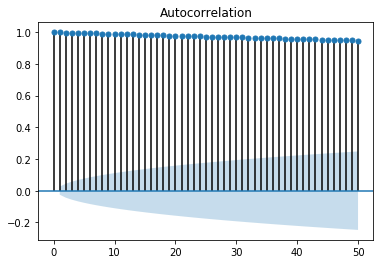

In [24]:
a=statsmodels.graphics.tsaplots.plot_acf(ru3000,lags=50)

<div class="alert alert-block alert-info">Problem 2.4</div>
create a series for the 1-lag difference of the Russell 3000 Log levels
(these are really the log returns of Rusell 3000).

Use `statsmodels.graphics.tsaplots.plot_acf` to investiguate if there are significant auto correlations
for the first 50 lages.

In [26]:
Delta_ru3000=ru3000[1:]-ru3000[:-1]

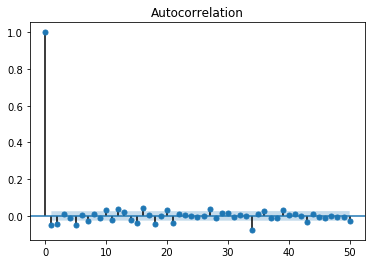

In [27]:
a=statsmodels.graphics.tsaplots.plot_acf(Delta_ru3000,lags=50)

In [28]:
# A few lags (including the first two) are out of the 95% confidence band. But all auto correlations look small.